# Estimating effect of multiple treatments

In [1]:
import numpy as np
import pandas as pd
import logging

import dowhy
from dowhy import CausalModel
import dowhy.datasets

import econml
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = dowhy.datasets.linear_dataset(10, num_common_causes=4, num_samples=10000,
                                    num_instruments=0, num_effect_modifiers=2,
                                     num_treatments=2,
                                    treatment_is_binary=False,
                                    num_discrete_common_causes=2,
                                    num_discrete_effect_modifiers=0,
                                    one_hot_encode=False)
df=data['df']
df.head()

,X0,X1,W0,W1,W2,W3,v0,v1,y
0,0.846388,0.783846,0.944644,-0.119919,3,1,6.684632,15.619628,679.274978
1,-0.382821,1.737644,-0.140717,1.156761,2,0,7.990008,10.652711,607.825673
2,0.150747,-0.409554,0.159065,1.227262,1,1,9.247153,12.982039,110.692336
3,0.662945,0.898566,-0.326534,0.329678,1,3,6.448918,16.419184,690.454111
4,0.326410,0.077312,0.238597,-0.058446,3,3,9.151193,19.622878,471.459850


In [3]:
model = CausalModel(data=data["df"], 
                    treatment=data["treatment_name"], outcome=data["outcome_name"], 
                    graph=data["gml_graph"])

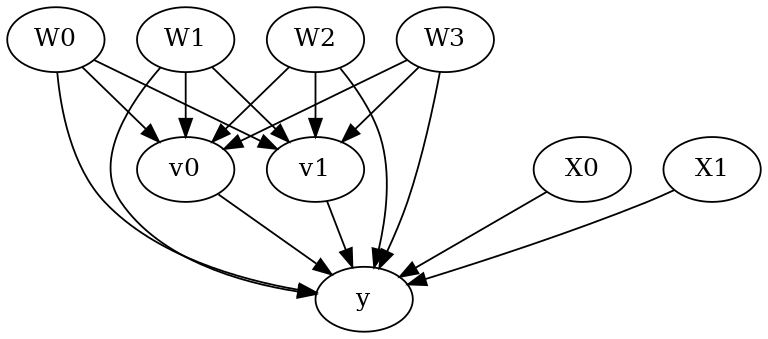

In [4]:
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [5]:
identified_estimand= model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                      
─────────(E[y|W1,W0,W3,W2])
d[v₀  v₁]                  
Estimand assumption 1, Unconfoundedness: If U→{v0,v1} and U→y then P(y|v0,v1,W1,W0,W3,W2,U) = P(y|v0,v1,W1,W0,W3,W2)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



## Linear model

Let us first see an example for a linear model. The control_value and treatment_value can be provided as a tuple/list when the treatment is multi-dimensional.

The interpretation is change in y when v0 and v1 are changed from (0,0) to (1,1).

In [6]:
linear_estimate = model.estimate_effect(identified_estimand, 
                                        method_name="backdoor.linear_regression",
                                       control_value=(0,0),
                                       treatment_value=(1,1),
                                       method_params={'need_conditional_estimates': False})
print(linear_estimate) 

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                      
─────────(E[y|W1,W0,W3,W2])
d[v₀  v₁]                  
Estimand assumption 1, Unconfoundedness: If U→{v0,v1} and U→y then P(y|v0,v1,W1,W0,W3,W2,U) = P(y|v0,v1,W1,W0,W3,W2)

## Realized estimand
b: y~v0+v1+W1+W0+W3+W2+v0*X0+v0*X1+v1*X0+v1*X1
Target units: ate

## Estimate
Mean value: 53.409694491477794



You can estimate conditional effects, based on effect modifiers. 

In [7]:
linear_estimate = model.estimate_effect(identified_estimand, 
                                        method_name="backdoor.linear_regression",
                                       control_value=(0,0),
                                       treatment_value=(1,1))
print(linear_estimate) 

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                      
─────────(E[y|W1,W0,W3,W2])
d[v₀  v₁]                  
Estimand assumption 1, Unconfoundedness: If U→{v0,v1} and U→y then P(y|v0,v1,W1,W0,W3,W2,U) = P(y|v0,v1,W1,W0,W3,W2)

## Realized estimand
b: y~v0+v1+W1+W0+W3+W2+v0*X0+v0*X1+v1*X0+v1*X1
Target units: ate

## Estimate
Mean value: 53.409694491477794



## More methods

You can also use methods from EconML or CausalML libraries that support multiple treatments. You can look at examples from the conditional effect notebook: https://py-why.github.io/dowhy/example_notebooks/dowhy-conditional-treatment-effects.html

Propensity-based methods do not support multiple treatments currently. 
